In [1]:
from sklearn.cluster import  MiniBatchKMeans, KMeans, DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd
import math
from pylab import *
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import euclidean_distances
%matplotlib inline 

In [170]:
import folium
import json
from IPython.display import HTML

In [2]:
def find_unique(data, field):
    data_not_null=data[data[field].notnull()]
    duplicate_index=data_not_null.duplicated(field)
    unique=data_not_null[~duplicate_index]
    return unique

In [3]:
building_SF = pd.read_csv('C:\Users\Olga\Documents\RENUWIT\Urine_separation\shapefiles\\building_block_people_WGS.csv')

In [4]:
building_SF['num_people_int']=building_SF.num_people.round()

In [5]:
building_SF_array=np.array(building_SF)

In [6]:
building_virtual_buildings=[]
for row in building_SF_array:
    for i in range(int(row[-1])):
        building_virtual_buildings.append(row)
        

In [7]:
columns=['gid', 'fid_buildi', 'objname', 'numfaces', 'num_floor',
       'fid_landus', 'blklot', 'block_num', 'lot_num', 'resunits',
       'landuse', 'bldgsqft', 'yrbuilt', 'area_m2', 'county',
       'fid_tabblo', 'tractce10', 'housing10', 'lat', 'lon',
       'num_people', 'pop10','num_people_int']
building_virtual_buildings_df=pd.DataFrame(building_virtual_buildings, columns=columns)

In [8]:
building_virtual_buildings_df.to_csv('C:\Users\Olga\Documents\RENUWIT\Urine_separation\shapefiles\\building_virtual_buildings_WGS.csv')

In [9]:
building_SF_points=building_virtual_buildings_df[['lat','lon']]
data_plot=np.asarray(building_SF_points[:])

In [10]:
n = 20
k_means = KMeans(init='k-means++', n_clusters=n)
k_means.fit(building_SF_points)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=20, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [11]:
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels_unique = np.unique(k_means_labels)
ft = (k_means_labels, k_means_cluster_centers)

C:\Users\Olga\Anaconda2\lib\site-packages\matplotlib\lines.py:1107: UnicodeWarning: Unicode unequal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self._markerfacecolor != fc:


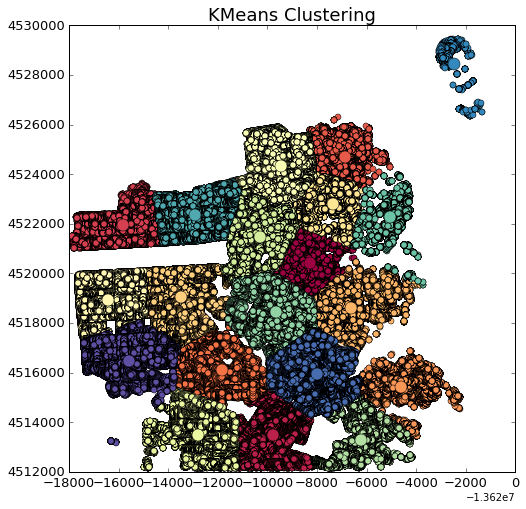

In [12]:
fig = plt.figure(figsize=(8, 8))
colors = plt.cm.Spectral(np.linspace(0, 1, n))

ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(n), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    plt.plot(data_plot[my_members, 1], data_plot[my_members, 0], 'w',
            markerfacecolor=col, marker='o', markersize=6)
    plt.plot(cluster_center[1], cluster_center[0], 'o',
            markerfacecolor=col, markeredgecolor='k', markersize=12)    
plt.title('KMeans Clustering',fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [13]:
size_all= []
for i in range (k_means_labels.max()):
    my_members = k_means_labels==i
    unique = find_unique(building_virtual_buildings_df[my_members],'gid')
    size_all.append(unique)

In [14]:
size_all_distance=[[] for i in range(k_means_labels.max())]
for i in range (k_means_labels.max()):
    for index, row in size_all[i].iterrows():
        point_lat_lon = [[row['lat'], row['lon']]]
        cluster_lat_lon = [[k_means_cluster_centers[i][0], k_means_cluster_centers[i][1]]]
        eu = cdist(point_lat_lon,cluster_lat_lon, 'euclidean')
        dist = eu[0][0]
        row['eu_dist'] = dist
        size_all_distance[i].append(row)

In [15]:
n2 = 1
k_means_2 = KMeans(init='k-means++', n_clusters=n2)
k_means_2.fit(k_means_cluster_centers)

k_means_labels_2 = k_means_2.labels_
k_means_cluster_centers_2 = k_means_2.cluster_centers_
k_means_labels_unique_2 = np.unique(k_means_labels_2)
ft = (k_means_labels_2, k_means_cluster_centers_2)

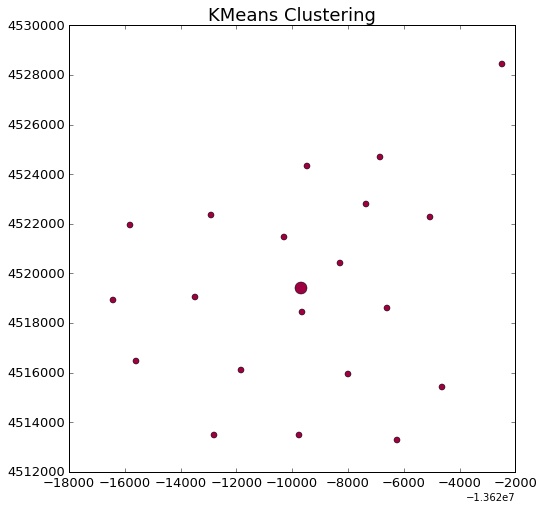

In [16]:
fig = plt.figure(figsize=(8, 8))
colors = plt.cm.Spectral(np.linspace(0, 1, n2))

ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(n2), colors):
    my_members = k_means_labels_2 == k
    cluster_center = k_means_cluster_centers_2[k]
    plt.plot(k_means_cluster_centers[my_members, 1], k_means_cluster_centers[my_members, 0], 'w',
            markerfacecolor=col, marker='o', markersize=6)
    plt.plot(cluster_center[1], cluster_center[0], 'o',
            markerfacecolor=col, markeredgecolor='k', markersize=12)    
plt.title('KMeans Clustering',fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [17]:
total_dist_all=[]
for i in range (k_means_labels.max()):
    df = pd.DataFrame(size_all_distance[i])
    total_dist = df['eu_dist'].sum()
    total_peop = df['num_people_int'].sum()
    all_totals = (i, total_peop, total_dist)
    total_dist_all.append(all_totals)

In [18]:
totals_all_df = pd.DataFrame(total_dist_all, columns=['cluster', 'num_people', 'total_dist_m'])

In [130]:
totals_all_df.to_csv('C:\Users\Olga\Documents\RENUWIT\Urine_separation\shapefiles\\totals_all_df_%d.csv' % n)

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
plt.plot(size_all[5]['lon'],size_all[5]['lat'],'w', markerfacecolor=col, marker='o', markersize=6)
plt.plot(k_means_cluster_centers[5][1],k_means_cluster_centers[5][0],'w', markerfacecolor=col, marker='o', markersize=20)

In [ ]:
size_all_unique_lat_lon = size_all_unique[['gid','lat','lon']]
size_all_unique_lat_lon.columns = ['id','x','y']

In [254]:
import doctest
from itertools import permutations


def distance(point1, point2):
    """
    Returns the Euclidean distance of two points in the Cartesian Plane.

    >>> distance([3,4],[0,0])
    5.0
    >>> distance([3,6],[10,6])
    7.0
    """
    return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2) ** 0.5


def total_distance(points):
    """
    Returns the length of the path passing throught
    all the points in the given order.

    >>> total_distance([[1,2],[4,6]])
    5.0
    >>> total_distance([[3,6],[7,6],[12,6]])
    9.0
    """
    return sum([distance(point, points[index + 1]) for index, point in enumerate(points[:-1])])


def travelling_salesman(points, start=None):
    """
    Finds the shortest route to visit all the cities by bruteforce.
    Time complexity is O(N!), so never use on long lists.

    >>> travelling_salesman([[0,0],[10,0],[6,0]])
    ([0, 0], [6, 0], [10, 0])
    >>> travelling_salesman([[0,0],[6,0],[2,3],[3,7],[0.5,9],[3,5],[9,1]])
    ([0, 0], [6, 0], [9, 1], [2, 3], [3, 5], [3, 7], [0.5, 9])
    """
    if start is None:
        start = points[0]
    return min([perm for perm in permutations(points) if perm[0] == start], key=total_distance)


def optimized_travelling_salesman(points, start=None):
    """
    As solving the problem in the brute force way is too slow,
    this function implements a simple heuristic: always
    go to the nearest city.

    Even if this algoritmh is extremely simple, it works pretty well
    giving a solution only about 25% longer than the optimal one (cit. Wikipedia),
    and runs very fast in O(N^2) time complexity.

    >>> optimized_travelling_salesman([[i,j] for i in range(5) for j in range(5)])
    [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [1, 4], [1, 3], [1, 2], [1, 1], [1, 0], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [3, 4], [3, 3], [3, 2], [3, 1], [3, 0], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4]]
    >>> optimized_travelling_salesman([[0,0],[10,0],[6,0]])
    [[0, 0], [6, 0], [10, 0]]
    """
    if start is None:
        start = points[0]
    must_visit = points
    path = [start]
    must_visit.remove(start)
    while must_visit:
        nearest = min(must_visit, key=lambda x: distance(path[-1], x))
        path.append(nearest)
        must_visit.remove(nearest)
    return path

In [286]:
total_distance(optimized_travelling_salesman(bb))

63615.99510136545

In [281]:
k_means_cluster_centers

array([[  4513436.02634513, -13629851.17972082],
       [  4524230.80081057, -13629495.36469607],
       [  4521174.99629453, -13630596.44201948],
       [  4521970.23515439, -13635786.07631529],
       [  4513237.9551714 , -13626232.81847673],
       [  4516693.67691877, -13635579.62287086],
       [  4522861.324491  , -13627252.66152016],
       [  4522265.55287602, -13625043.66110284],
       [  4518395.80268993, -13629299.72819647],
       [  4519019.17310742, -13633503.3050236 ],
       [  4522358.13649382, -13632902.07910403],
       [  4513600.01812009, -13633020.36941214],
       [  4528444.07814446, -13622485.99484497],
       [  4524733.7387597 , -13626888.30380035],
       [  4515829.84108277, -13627912.17803809],
       [  4516138.23023485, -13631537.01150561],
       [  4518985.71068649, -13636434.48094661],
       [  4520931.33465826, -13628502.06445842],
       [  4518691.21724761, -13626620.61700895],
       [  4515423.23205156, -13624598.57033039]])

In [284]:
bb=k_means_cluster_centers.tolist()

In [288]:
lat_lon=(size_all[1]['lat'],size_all[1]['lon'])

In [290]:
bbb=[]
for index, row in size_all[1].iterrows():
    new = row['lat']
    new_2 = row['lon']
    pp= (new, new_2)
    bbb.append(pp)

In [293]:
nnn=np.array(bbb)

In [295]:
list_nnn=nnn.tolist()

In [296]:
total_distance(optimized_travelling_salesman(list_nnn))

75388.082975339319